VIDEO GAMES REVIEWS - Group 09¶
      *******************************************************************
      *                                                                 *
      * Group members: Cindy Huang, Lan Bowen, and Manoj Kamalumpundi   *
      *                                                                 *
      *******************************************************************

1. Review Data

In [1]:
import pandas as pd
import nltk
import re
#Import steam_reviews.csv to df
df = pd.read_csv("steam_reviews2.csv",encoding="utf8",sep='|', delimiter=None) 
#Needed to replace delimiter because import confused by comma in text
df.head()

,date_posted,funny,helpful,hour_played,is_early_access_review,recommendation,review,title
0,2/10/2019,2,4,578,False,Recommended,&gt Played as German Reich&gt Declare war on B...,Expansion - Hearts of Iron IV: Man the Guns
1,2/10/2019,0,0,184,False,Recommended,yes.,Expansion - Hearts of Iron IV: Man the Guns
2,2/7/2019,0,0,892,False,Recommended,Very good game although a bit overpriced in my...,Expansion - Hearts of Iron IV: Man the Guns
3,6/14/2018,126,1086,676,False,Recommended,Out of all the reviews I wrote This one is pro...,Dead by Daylight
4,6/20/2017,85,2139,612,False,Recommended,Disclaimer I survivor main. I play games for f...,Dead by Daylight


In [2]:
#Review the data info
df.shape

(434891, 8)

2. Clean up review column only

In [3]:
#Repace all non english letters and # with emptry string to remove "NaN" or "None"
df['review1'] = df.review.str.replace(r'[^a-zA-Z ]\s?',r'',regex=True)
df['review1'] = df['review1'].str.replace(r'\b(\w+)(\s+\1)+\b', r'\1') #remove repeating words
df['review1']


0         gt Played as German Reichgt Declare war on Bel...
1                                                       yes
2         Very good game although a bit overpriced in my...
3         Out of all the reviews I wrote This one is pro...
4         Disclaimer I survivor mainI play games for fun...
                                ...                        
434886    YOUR FLESH WILL ROT AND DECAYSTEEL IS IMMORTAL...
434887    Domini and Dominae I believe what we are deali...
434888    First off if you like X Com style of games you...
434889    As a disclaimer Im an AdMech player on the tab...
434890    Dont listen to people who claim its the game o...
Name: review1, Length: 434891, dtype: object

In [4]:
#Delete rows without any review text
import pandasql as ps
df = ps.sqldf("select * from df WHERE review1 is not null or review1 <> ''")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 433375 entries, 0 to 433374
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   date_posted             433375 non-null  object
 1   funny                   433375 non-null  int64 
 2   helpful                 433375 non-null  int64 
 3   hour_played             433375 non-null  int64 
 4   is_early_access_review  433375 non-null  int64 
 5   recommendation          433375 non-null  object
 6   review                  433375 non-null  object
 7   title                   433375 non-null  object
 8   review1                 433375 non-null  object
dtypes: int64(4), object(5)
memory usage: 29.8+ MB


In [5]:
import pandas as pd
from afinn import Afinn
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
afinn = Afinn(emoticons=True)        #Initialize an analyzer

df["AFINN"]=[afinn.score(s) for s in df["review1"]]
df["TextBlob"]=[TextBlob(s).sentiment.polarity for s in df["review1"]]
analyzer=SentimentIntensityAnalyzer()
df["VADER"]=[analyzer.polarity_scores(s)['compound'] for s in df["review1"]]

df.head(5)

,date_posted,funny,helpful,hour_played,is_early_access_review,recommendation,review,title,review1,AFINN,TextBlob,VADER
0,2/10/2019,2,4,578,0,Recommended,&gt Played as German Reich&gt Declare war on B...,Expansion - Hearts of Iron IV: Man the Guns,gt Played as German Reichgt Declare war on Bel...,0.0,-0.016667,0.3400
1,2/10/2019,0,0,184,0,Recommended,yes.,Expansion - Hearts of Iron IV: Man the Guns,yes,1.0,0.000000,0.4019
2,2/7/2019,0,0,892,0,Recommended,Very good game although a bit overpriced in my...,Expansion - Hearts of Iron IV: Man the Guns,Very good game although a bit overpriced in my...,6.0,0.162000,0.7841
3,6/14/2018,126,1086,676,0,Recommended,Out of all the reviews I wrote This one is pro...,Dead by Daylight,Out of all the reviews I wrote This one is pro...,13.0,0.061111,0.2052
4,6/20/2017,85,2139,612,0,Recommended,Disclaimer I survivor main. I play games for f...,Dead by Daylight,Disclaimer I survivor mainI play games for fun...,16.0,-0.094286,-0.8936


In [6]:
#Generate the correlations matrix of different sentiment scores.
df.corr()

,funny,helpful,hour_played,is_early_access_review,AFINN,TextBlob,VADER
funny,1.000000,0.000185,0.000129,0.000689,0.000529,-0.001842,0.001342
helpful,0.000185,1.000000,0.006336,-0.000093,0.007271,-0.002119,0.001834
hour_played,0.000129,0.006336,1.000000,0.039009,0.009470,0.025374,0.031621
is_early_access_review,0.000689,-0.000093,0.039009,1.000000,0.000830,-0.001853,0.017231
AFINN,0.000529,0.007271,0.009470,0.000830,1.000000,0.229683,0.472324
TextBlob,-0.001842,-0.002119,0.025374,-0.001853,0.229683,1.000000,0.455876
VADER,0.001342,0.001834,0.031621,0.017231,0.472324,0.455876,1.000000


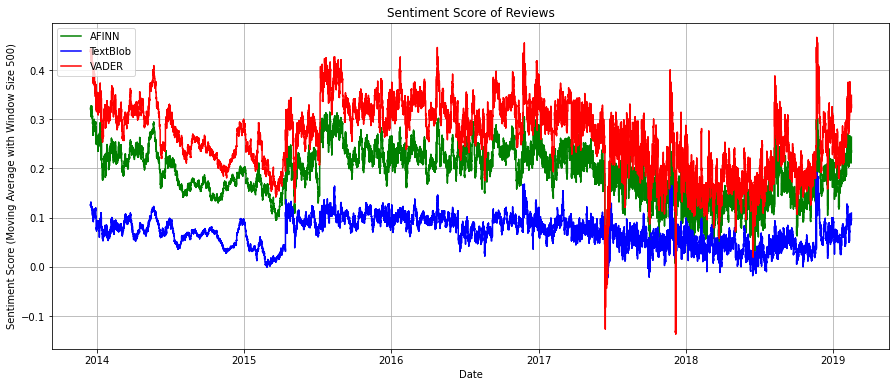

In [7]:
df = ps.sqldf("select *, CASE WHEN AFINN > 10 Then 1.0 WHEN AFINN < -10 THEN -1.0 Else AFINN/10.0 End AS AFINN_scaled from df")

df["date_posted"]=pd.to_datetime(df["date_posted"],format="%m/%d/%Y")
df.sort_values(by=["date_posted"],ascending=True,inplace=True)
df.reset_index(drop=True,inplace=True)

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(15, 6))
plt.plot(df.date_posted, df.AFINN_scaled.rolling(window=500).mean(), "-g", label="AFINN")
plt.plot(df.date_posted, df.TextBlob.rolling(window=500).mean(), "-b", label="TextBlob")
plt.plot(df.date_posted, df.VADER.rolling(window=500).mean(), "-r", label="VADER")
plt.legend(loc="upper left")
plt.title("Sentiment Score of Reviews")
plt.xlabel("Date")
plt.ylabel("Sentiment Score (Moving Average with Window Size 500)")
plt.grid(axis='both')

5. Summary Statistics

In [8]:
#How many Recommended and Not Recommended 
ps.sqldf("select Recommendation, Count(1) AS RecommendationCount from df group by Recommendation")

,recommendation,RecommendationCount
0,Not Recommended,130624
1,Recommended,302751


In [9]:
#There are 7 video games that Not Recommended and 40 video games with Recommended
rec = ps.sqldf("select title, SUM(CASE WHEN Recommendation = 'Recommended' Then 1.0 Else 0.0 End) AS Recommendation, Count(1) AS TotalReviews from df group by title order by Count(1) desc")
rec = rec.set_index('title')
rec

,Recommendation,TotalReviews
title,,
PLAYERUNKNOWN'S BATTLEGROUNDS,86726.0,144846
Grand Theft Auto V,58814.0,99677
Rust,55649.0,70907
Rocket League®,61624.0,67765
Dead by Daylight,17084.0,22178
MONSTER HUNTER: WORLD,14254.0,18390
ASTRONEER,2570.0,2658
The Elder Scrolls V: Skyrim Special Edition,982.0,1471
RESIDENT EVIL 2 / BIOHAZARD RE:2,1376.0,1384


<AxesSubplot:ylabel='title'>

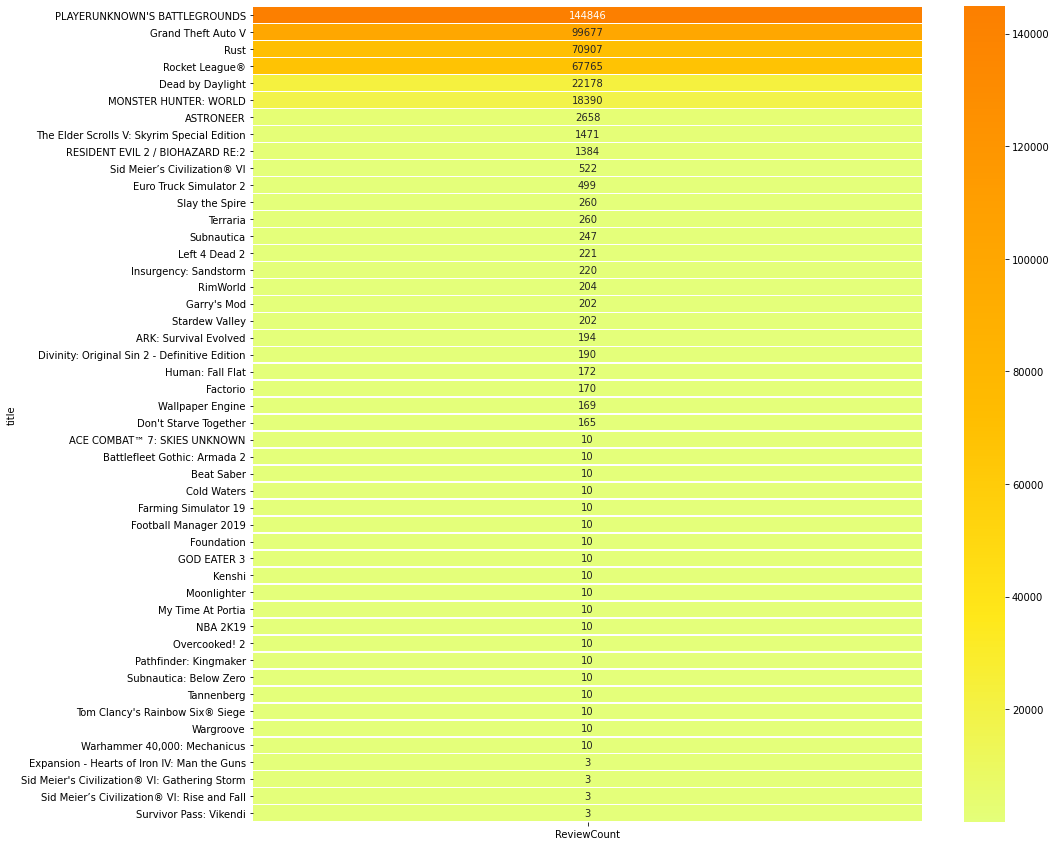

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

rec = ps.sqldf("select title, Count(1) AS ReviewCount from df group by title order by ReviewCount desc")
rec = rec.set_index('title')

fig, ax = plt.subplots(figsize = (15, 15))
sns.heatmap(rec, cmap = 'Wistia', linewidths = 0.30, annot = True,fmt='g')


<AxesSubplot:ylabel='title'>

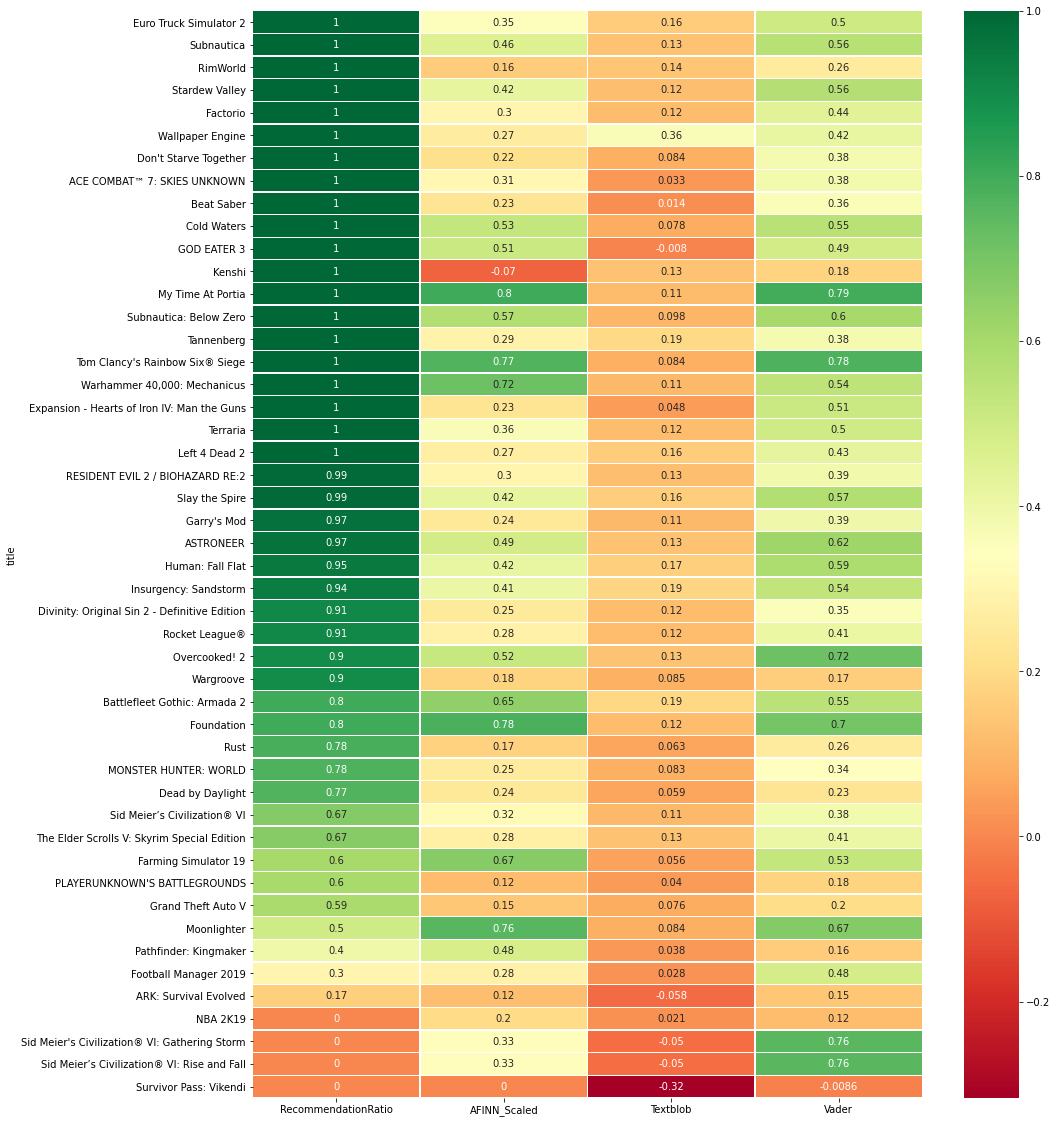

In [11]:
#Sentiment Heatmap of all games
import seaborn as sns
import matplotlib.pyplot as plt

rec = ps.sqldf("select title, SUM(CASE WHEN Recommendation = 'Recommended' Then 1.0 Else 0.0 End)/Count(1) AS RecommendationRatio, AVG(AFINN_scaled) as AFINN_Scaled, AVG(TextBlob) as Textblob, AVG(VADER) as Vader from df group by title order by RecommendationRatio desc, Count(1) desc")
rec = rec.set_index('title')

fig, ax = plt.subplots(figsize = (15, 20))

sns.heatmap(rec, cmap ='RdYlGn', linewidths = 0.30, annot = True)


<AxesSubplot:ylabel='title'>

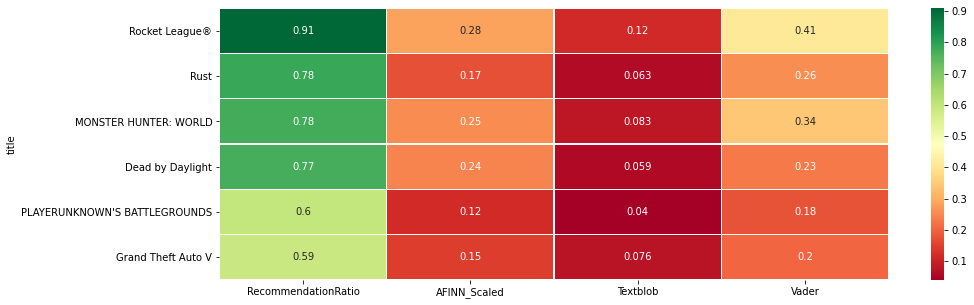

In [15]:
#Sentiment Heatmap of top 6 games
import seaborn as sns
import matplotlib.pyplot as plt

rec = ps.sqldf("select title, SUM(CASE WHEN Recommendation = 'Recommended' Then 1.0 Else 0.0 End)/Count(1) AS RecommendationRatio, AVG(AFINN_scaled) as AFINN_Scaled, AVG(TextBlob) as Textblob, AVG(VADER) as Vader from df group by title HAVING COUNT(1) > 3000 order by RecommendationRatio desc, Count(1) desc")
rec = rec.set_index('title')

fig, ax = plt.subplots(figsize = (15, 5))

sns.heatmap(rec, cmap ='RdYlGn', linewidths = 0.30, annot = True)

<AxesSubplot:ylabel='title'>

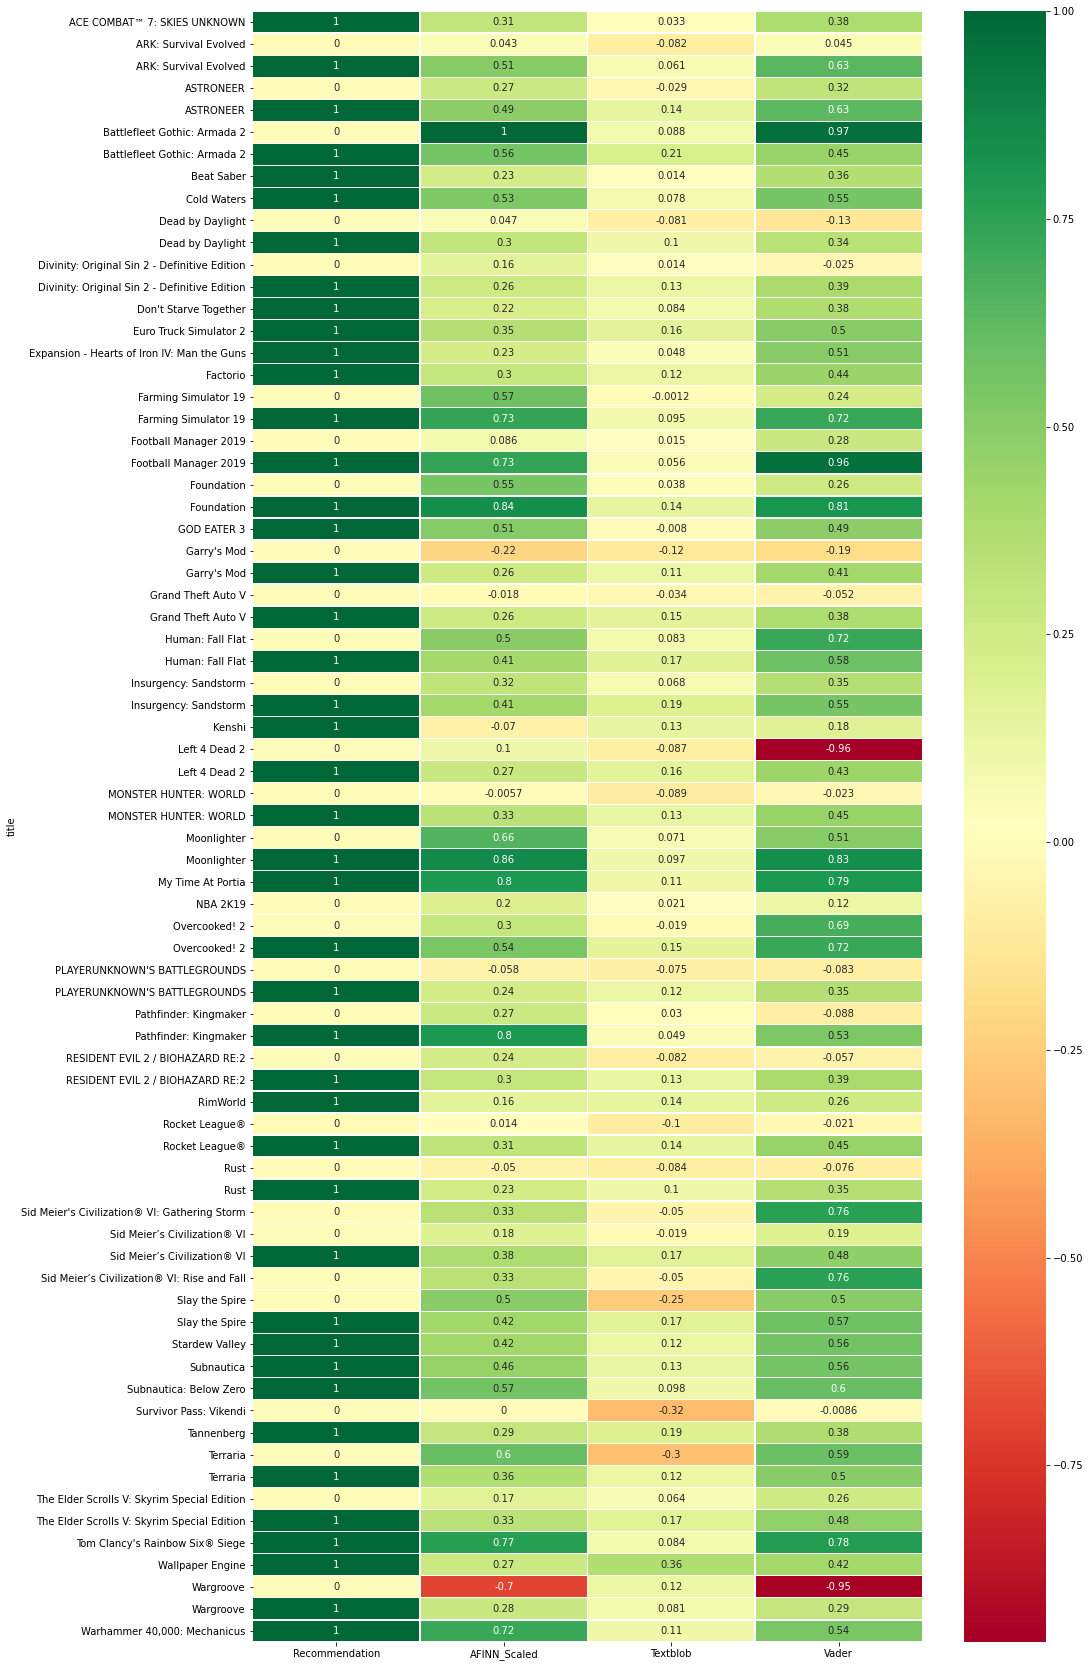

In [13]:
#Sentiment Heatmap of games split by where recommend or not recommend
import seaborn as sns
import matplotlib.pyplot as plt

rec = ps.sqldf("select title, CASE WHEN Recommendation = 'Recommended' Then 1.0 Else 0.0 End AS Recommendation, AVG(AFINN_scaled) as AFINN_Scaled, AVG(TextBlob) as Textblob, AVG(VADER) as Vader from df group by title,Recommendation order by Title, Recommendation")
rec = rec.set_index('title')

fig, ax = plt.subplots(figsize = (15, 30))

sns.heatmap(rec, cmap ='RdYlGn', linewidths = 0.30, annot = True)


<AxesSubplot:ylabel='title'>

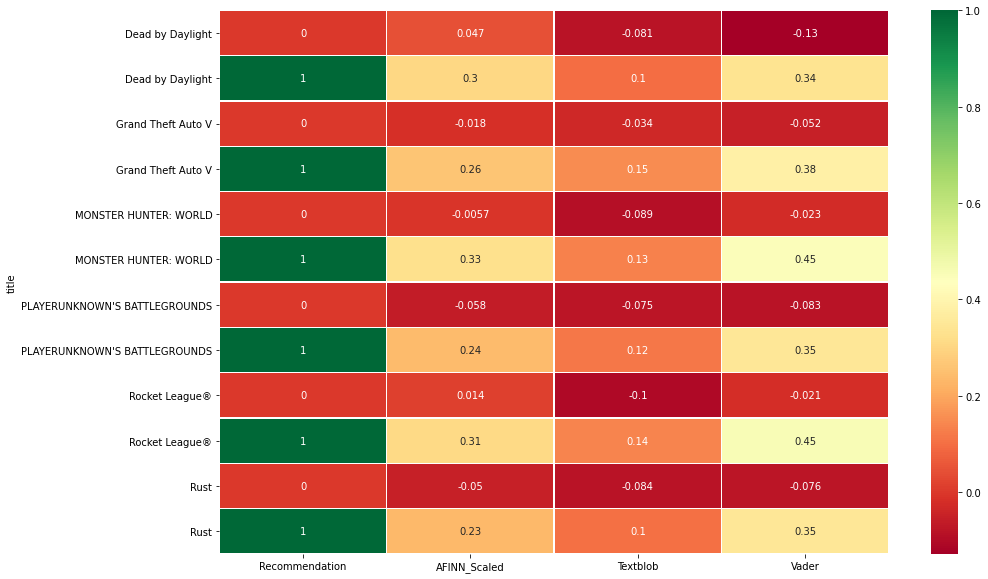

In [16]:
#Sentiment Heatmap of top 6 games split by where recommend or not recommend
import seaborn as sns
import matplotlib.pyplot as plt

rec = ps.sqldf("select title, CASE WHEN Recommendation = 'Recommended' Then 1.0 Else 0.0 End AS Recommendation, AVG(AFINN_scaled) as AFINN_Scaled, AVG(TextBlob) as Textblob, AVG(VADER) as Vader from df group by title,Recommendation HAVING COUNT(1) > 3000 order by Title, Recommendation")
rec = rec.set_index('title')

fig, ax = plt.subplots(figsize = (15, 10))

sns.heatmap(rec, cmap ='RdYlGn', linewidths = 0.30, annot = True)
